# Histograms
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html#table-of-content-histograms

For 2d histogram see `src/color_histogram.py`
For Backprojection see `src/backprojection.py`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from src.config import DATA_PATH
from src.utils import plot_images

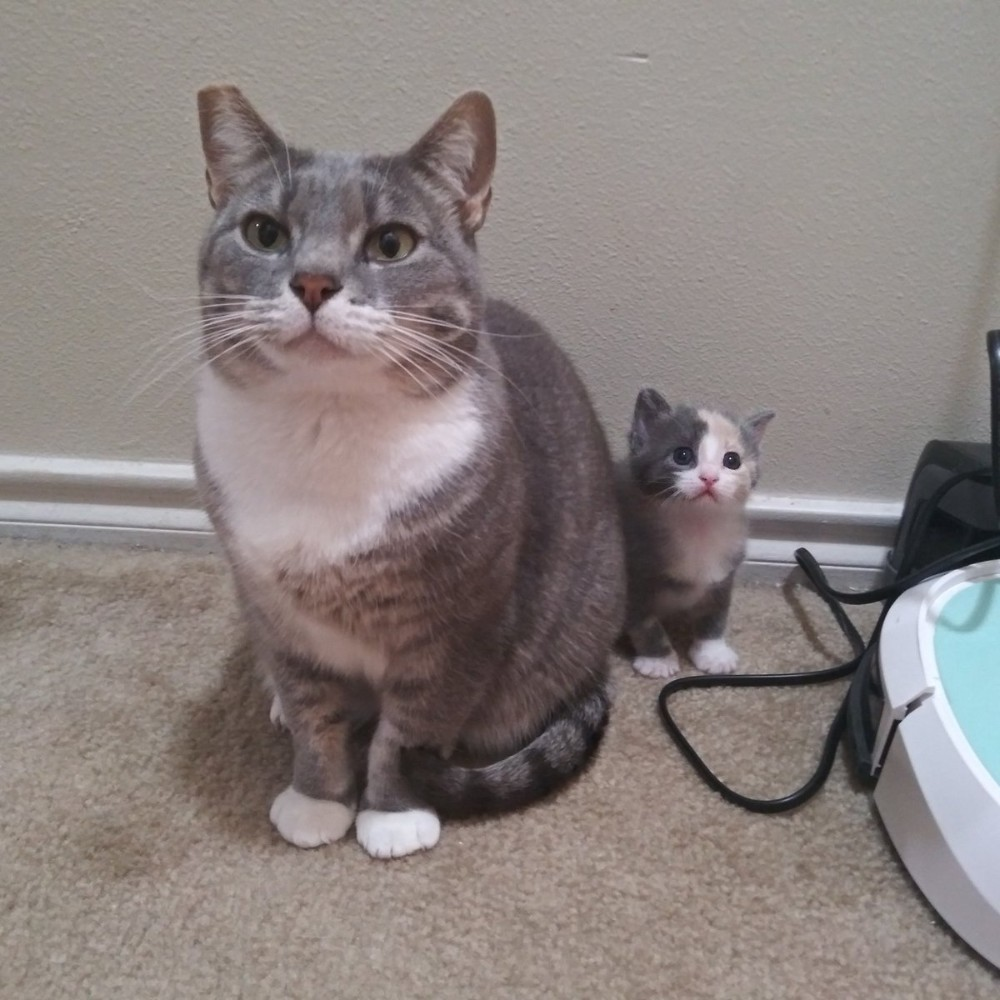

In [4]:
image = cv2.imread(path.join(DATA_PATH, "cat.jpg"))
Image.fromarray(image[:, :, ::-1])

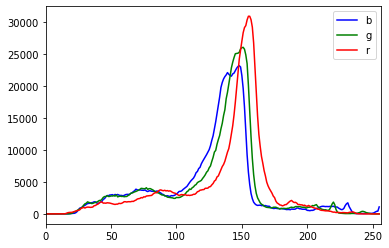

In [5]:
colors = ("b", "g", "r")
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    _ = plt.plot(histogram, color=color, label=color)
_ = plt.xlim([0, 256])
_ = plt.legend()

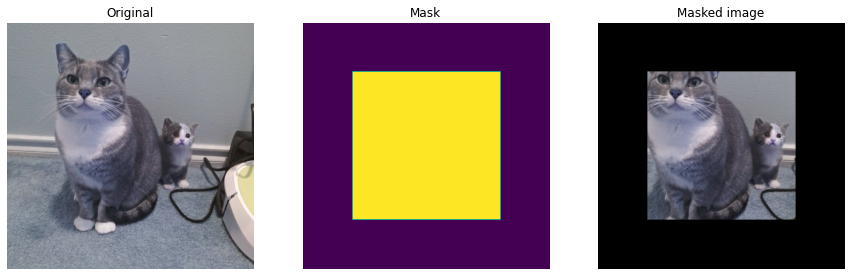

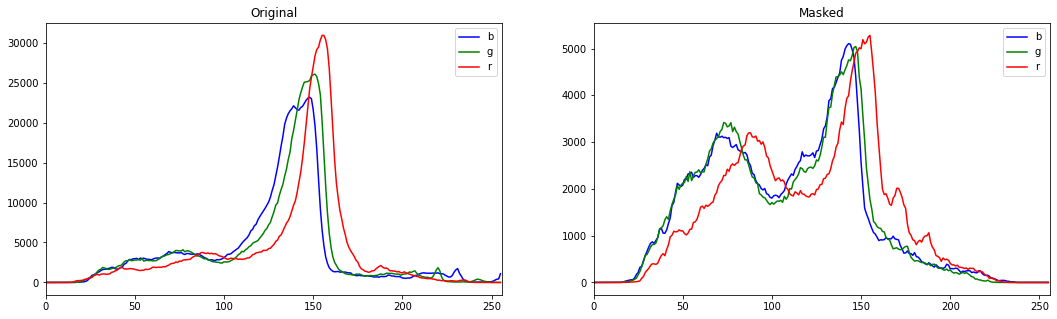

In [6]:
# Histogram on the masked image
mask = np.zeros(image.shape[:2], np.uint8)
mask[200:800, 200: 800] = 255
image_masked = cv2.bitwise_and(image, image, mask=mask) # it's strange, but same in docs

plot_images([image, mask, image_masked],
            names=["Original", "Mask", "Masked image"],
            figsize=(15, 10))

f, axes = plt.subplots(1, 2, figsize=(18, 5))

colors = ("b", "g", "r")
for i, color in enumerate(colors):
    for ax, m in zip(axes, (None, mask)):
        histogram = cv2.calcHist([image], [i], m, [256], [0, 256])
        _ = ax.plot(histogram, color=color, label=color)

for ax, title in zip(axes, ["Original", "Masked"]):
    _ = ax.set_xlim([0, 256])
    _ = ax.set_title(title)
    _ = ax.legend()

# Histogram equalization

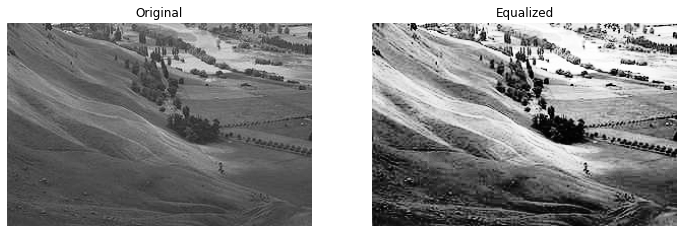

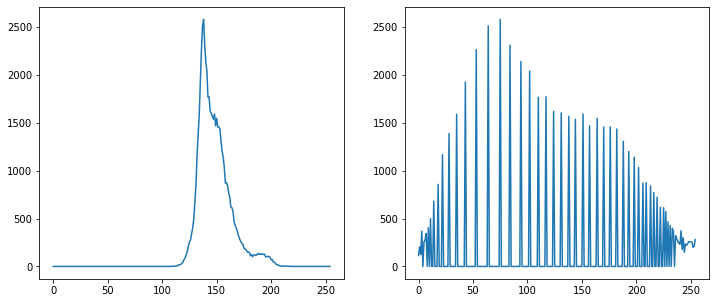

In [7]:
image = cv2.imread(path.join(DATA_PATH, "wiki.jpg"), 0)
image_equalized = cv2.equalizeHist(image)

plot_images([image, image_equalized],
            names=["Original", "Equalized"],
            figsize=(12, 5), imshow_kwargs={"cmap": plt.cm.gray})

f, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, img in zip(axes, [image, image_equalized]):
    histogram = cv2.calcHist([img], [0], None, [255], [0, 255])
    _ = ax.plot(histogram)

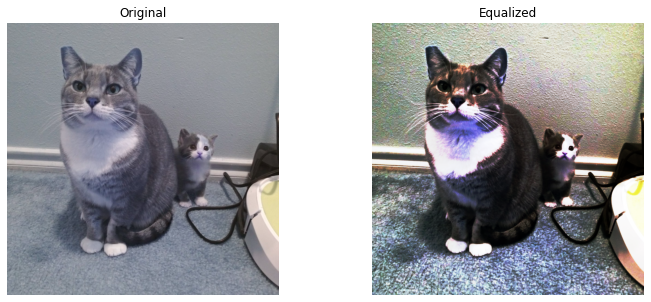

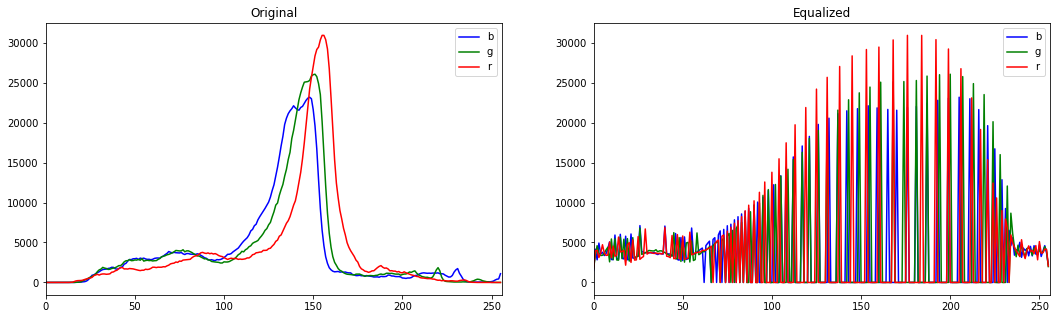

In [8]:
# for 3-chanel is strange and fun)
image = cv2.imread(path.join(DATA_PATH, "cat.jpg"))

image_equalized = np.zeros_like(image)
for i in range(3):
    image_equalized[:, :, i] = cv2.equalizeHist(image[:, :, i])

plot_images([image, image_equalized],
            names=["Original", "Equalized"],
            figsize=(12, 5))


f, axes = plt.subplots(1, 2, figsize=(18, 5))
colors = ("b", "g", "r")
for i, color in enumerate(colors):
    for ax, img in zip(axes, (image, image_equalized)):
        histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
        _ = ax.plot(histogram, color=color, label=color)

for ax, title in zip(axes, ["Original", "Equalized"]):
    _ = ax.set_xlim([0, 256])
    _ = ax.set_title(title)
    _ = ax.legend()

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

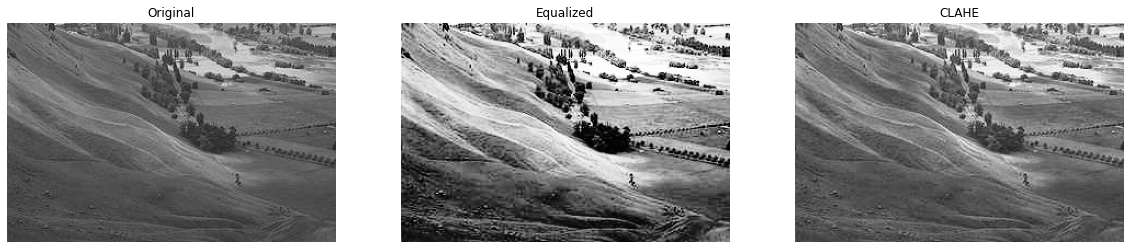

In [9]:
image = cv2.imread(path.join(DATA_PATH, "wiki.jpg"), 0)

image_equalized = cv2.equalizeHist(image)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
image_clahe = clahe.apply(image)

plot_images([image, image_equalized, image_clahe],
            names=["Original", "Equalized", "CLAHE"],
            figsize=(20, 10), imshow_kwargs={"cmap": plt.cm.gray})

# 2D Histograms

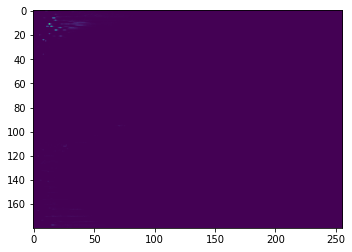

In [28]:
# for more info see `src/backprojection.py` and `src/color_histogram.py`
image = cv2.imread(path.join(DATA_PATH, "cat.jpg"))
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

histogram = cv2.calcHist([image_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
_ = plt.imshow(histogram)